In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from quant_tools import portfolio_optimization as opt, performance_analysis as pt, data_preprocessing as dp
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [2]:
tickers = pd.read_csv(r'C:\Users\marcu\Documents\Quant\Programming\Data\sp500-master\sp500.csv').iloc[:, 0].head(100).values
tickers

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP',
       'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE',
       'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK',
       'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA',
       'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO',
       'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX',
       'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK',
       'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO',
       'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX',
       'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC',
       'CNP', 'CDAY'], dtype=object)

In [3]:
# Close Prices
close_asset_prices = pd.DataFrame()

# Returns of opening prices
open_asset_returns = pd.DataFrame()

# Returns of close prices
close_asset_returns = pd.DataFrame()

# True Ranges of Prices
true_ranges = pd.DataFrame()

tickers = ['GLD', 'SPY', 'BIL', 'TLT', 'HYG', 'VNQ']

for ticker in tickers:

    prices = yf.download(ticker, start='2000-01-01', end=dt.date.today())
    
    # Get i'th asset's returns
    close_prices = prices['Adj Close'].dropna()
    close_prices = close_prices.rename(ticker)
    close_rets = prices['Adj Close'].pct_change().dropna()
    close_rets = close_rets.rename(ticker)
    open_rets = prices['Open'].pct_change().dropna()
    open_rets = open_rets.rename(ticker)
    tmp_true_range = dp.true_range(prices) # ta.atr(high=prices['High'], low=prices['Low'], close=prices['Adj Close'], length=20)
    tmp_true_range = tmp_true_range.rename(ticker)

    close_asset_prices = pd.concat([close_asset_prices, close_prices, ], axis=1)
    close_asset_returns = pd.concat([close_asset_returns, close_rets], axis=1)
    open_asset_returns = pd.concat([open_asset_returns, open_rets], axis=1)
    true_ranges = pd.concat([true_ranges, tmp_true_range], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Create atr risk parity optimization functions

In [4]:
portfolio_value = 100000

In [5]:
n = close_asset_prices.columns.size
sd2_pct_move = .05
sd2_VaR = sd2_pct_move / n
sd1_VaR = sd2_VaR / 2

In [13]:
full_portfolio_w = pd.DataFrame(index=close_asset_returns.index)
full_portfolio_w_risk_parity = pd.DataFrame(index=close_asset_returns.index)
portfolio_w = {}
risk_parity_w = {}
rebal_freq = 5
lookback_window = 60

for date in close_asset_returns.index[::rebal_freq]:

    portfolio_w[date] = opt.atr_risk_parity(prices = close_asset_prices.loc[:date], true_ranges=true_ranges.loc[:date], lookback_window=10, target_risk = sd1_VaR, portfoio_value = portfolio_value, long_only=True)
    risk_parity_w[date] = opt.risk_parity(returns = close_asset_returns.loc[:date], long_only=True)
    # risk_parity_w[date] = opt.risk_parity(returns = close_asset_returns.loc[:date], long_only=True) -------------- generates interesting results

Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contributions: 
GLD   NaN
SPY   NaN
BIL   NaN
TLT   NaN
HYG   NaN
VNQ   NaN
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contributions: 
GLD   NaN
SPY   NaN
BIL   NaN
TLT   NaN
HYG   NaN
VNQ   NaN
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contributions: 
GLD   NaN
SPY   NaN
BIL   NaN
TLT   NaN
HYG   NaN
VNQ   NaN
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contributions: 
GLD   NaN
SPY   NaN
BIL   NaN
TLT   NaN
HYG   NaN
VNQ   NaN
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contributions: 
GLD   NaN
SPY   NaN
BIL   NaN
TLT   NaN
HYG   NaN
VNQ   NaN
dtype: float64
Target Portfolio Risk: 2500.0
Ex-Ante True Range Dollar Risk: nan
Ex-Ante True Range Risk Contr

In [14]:
full_portfolio_w = pd.concat([full_portfolio_w, pd.DataFrame(portfolio_w).T.dropna()], axis=1).ffill()
full_portfolio_w = full_portfolio_w.apply(lambda w: w / w.sum(), axis=1)
full_portfolio_w.dropna(inplace=True)

full_portfolio_w_risk_parity = pd.concat([full_portfolio_w_risk_parity, pd.DataFrame(risk_parity_w).T.dropna()], axis=1).ffill()
full_portfolio_w_risk_parity.dropna(inplace=True)

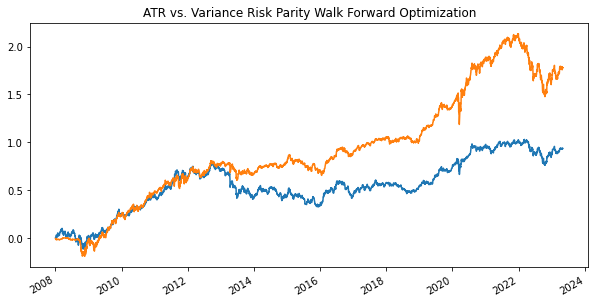

In [15]:
# Get weighted returns & scale based on pct notional exposure
raw_rets = dp.scale_vol((close_asset_returns.shift(-1)*full_portfolio_w).sum(1).dropna().loc[dt.date(2008, 1, 1):])
raw_rets.rename('ATR Risk Parity', inplace=True)

risk_parity_rets = dp.scale_vol((close_asset_returns.shift(-1)*full_portfolio_w_risk_parity).sum(1).dropna().loc[dt.date(2008, 1, 1):])
risk_parity_rets.rename('Variance Risk Parity', inplace=True)

plt.figure(figsize=(10,5))
pt.cumulative_returns(raw_rets).plot()
pt.cumulative_returns(risk_parity_rets).plot()
plt.title('ATR vs. Variance Risk Parity Walk Forward Optimization')
plt.show()

<AxesSubplot:title={'center':'1/N Portfolio'}>

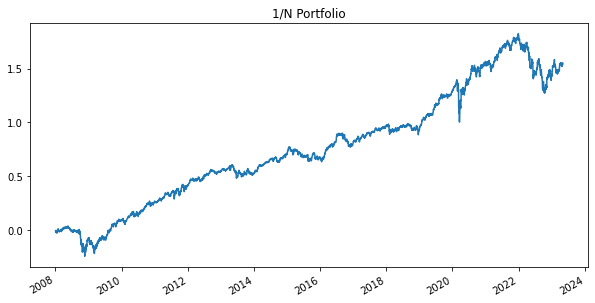

In [16]:
naive_portfolio = dp.scale_vol((close_asset_returns.shift(-1) / len(close_asset_returns.columns)).sum(1).loc[dt.date(2008, 1, 1):])
plt.figure(figsize=(10,5))
pt.cumulative_returns(naive_portfolio).plot(title='1/N Portfolio')

In [17]:
pt.performance_summary(raw_rets), pt.performance_summary(risk_parity_rets), pt.performance_summary(naive_portfolio)
pt.performance_summary(pd.concat([raw_rets, risk_parity_rets, naive_portfolio], axis=1))

,ATR Risk Parity Performance Summary,Variance Risk Parity Performance Summary,0 Performance Summary
Sharpe Ratio,0.481,0.717,0.660
Drift Adjusted Sharpe Ratio,0.046,0.153,0.269
CAGR,0.044,0.069,0.063
Vol,0.100,0.100,0.100
Sortino Ratio,0.654,0.907,0.823
Martin (Ulcer) Ratio,0.431,1.393,1.199
Omega Ratio,0.965,1.008,0.997
RR Ratio,1.091,1.150,1.139
Win Rate,0.533,0.546,0.550
Skew,-0.036,-0.253,-0.061


In [57]:
pt.performance_summary(pd.concat([np.log(1+raw_rets), np.log(1+risk_parity_rets), np.log(1+naive_portfolio)], axis=1))

,ATR Risk Parity Performance Summary,Variance Risk Parity Performance Summary,0 Performance Summary
Sharpe Ratio,0.467,0.610,0.607
Drift Adjusted Sharpe Ratio,0.034,0.140,0.297
CAGR,0.042,0.058,0.058
Vol,0.100,0.100,0.100
Sortino Ratio,0.626,0.690,0.747
Martin (Ulcer) Ratio,0.393,1.199,1.033
Omega Ratio,0.963,0.984,0.986
RR Ratio,1.088,1.161,1.127
Win Rate,0.532,0.551,0.550
Skew,-0.129,0.113,-0.191
